# Step 1) Load in the MNIST dataset and examine its structure.

- Use any library to load the MNIST dataset (included with both TensorFlow and PyTorch modules).b

In [66]:
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

- Take a closer look at the data, inspecting its size, shape, and quantity.

In [67]:
train_images

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [68]:
train_images.shape

(60000, 28, 28)

In [69]:
len(train_images)

60000

In [70]:
train_labels.shape

(60000,)

In [71]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [72]:
test_images.shape

(10000, 28, 28)

In [73]:
test_labels.shape

(10000,)

- Using eitherOpenCV or Matplotlib (or others), view some random samples of the handwritten digits and observe the complexity of the images. Do you have any issues identifying these written numbers?

In [74]:
import matplotlib.pyplot as plt
%matplotlib inline

def viewSample(number):
    image = test_images[number]
    fig = plt.figure
    plt.imshow(image, cmap='gray')
    plt.show()

Sample 1


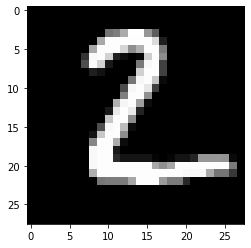

Label:  2
Sample 2


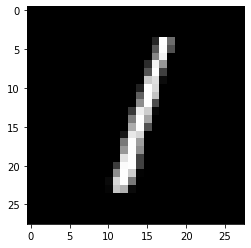

Label:  1
Sample 3


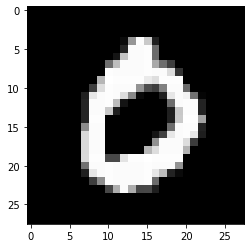

Label:  0
Sample 4


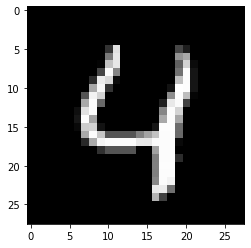

Label:  4
Sample 5


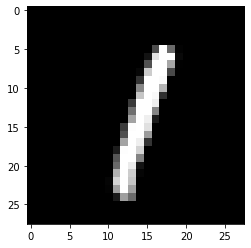

Label:  1
Sample 6


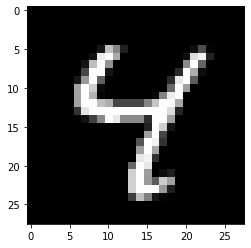

Label:  4
Sample 7


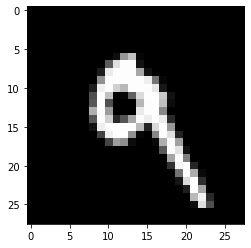

Label:  9
Sample 8


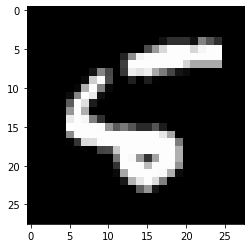

Label:  5
Sample 9


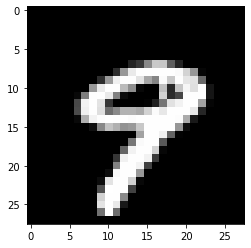

Label:  9
Sample 10


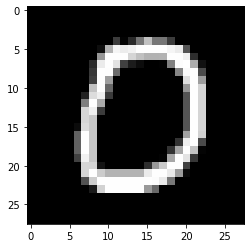

Label:  0


In [75]:
for i in [1,2,3,4,5, 6, 7, 8, 9, 10]:
    print("Sample", i)
    viewSample(i)
    print("Label: ", test_labels[i])

# Step 2) Using NumPy or other libraries, prepare your dataset for training.

- Ensure the format or shape of the data is appropriate for input into your model (one-hot-encoding is needed for the labels).

In [76]:
train_x = train_images.reshape((60000, 28, 28, 1))
train_x = train_images.astype('float32') / 255
test_x = test_images.reshape((10000, 28, 28, 1))
test_x = test_images.astype('float32') / 255

In [77]:
train_x.shape

(60000, 28, 28)

In [78]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [79]:
from keras.utils import to_categorical
train_y = to_categorical(train_labels)
test_y = to_categorical(test_labels)

train_y

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

- Ensure data types are correct and that data is normalized.

# Step 3) Create a CNN with these specifications

- Input dimensions of 28 x 28 x 1.
- Two convolution layers (kernel size 3x3): the first with 64 filters, the second with 32. Use ReLU as the activation layer.
- Max pooling of size 2 x 2.
- Dropout rate of 0.25.
- Add a sense layer comprising 128 outputs.
- Add another dropout layer using a rate setting of 0.5.
- Add the final Dense or Fully Connected Layer that indicates the class probabilities.

In [80]:
from tensorflow import keras
from tensorflow.keras import layers
inputs = keras.Input(shape=(28, 28, 1))
x = layers.Conv2D(filters=64, kernel_size=3, activation='relu')(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Dropout(0.25)(x)
x = layers.Dense(128, activation='relu')(x)
x = layers.Dropout(0.5)(x)
x = layers.Flatten()(x)

outputs = layers.Dense(10, activation='softmax')(x)
model = keras.Model(inputs=inputs, outputs=outputs)
model.summary()

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 24, 24, 32)        18464     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 12, 12, 32)        0         
_________________________________________________________________
dense_8 (Dense)              (None, 12, 12, 128)       4224      
_________________________________________________________________
dropout_9 (Dropout)          (None, 12, 12, 128)       0   

# Step 4) Train this CNN on the MNIST dataset you prepared in Step 2.

## Train for at least 5 epochs using a batch size of 32.

In [81]:
model.compile(optimizer='rmsprop',
              loss='CategoricalCrossentropy',
              metrics=['accuracy'])

history = model.fit(train_x, train_y, epochs=5, batch_size=32, validation_data=(test_x, test_y))

Epoch 1/5
1875/1875 [==============================] - 99s 53ms/step - loss: 0.2861 - accuracy: 0.9107 - val_loss: 0.0471 - val_accuracy: 0.9843
Epoch 2/5
1875/1875 [==============================] - 102s 54ms/step - loss: 0.0669 - accuracy: 0.9808 - val_loss: 0.0432 - val_accuracy: 0.9857
Epoch 3/5
1875/1875 [==============================] - 269s 144ms/step - loss: 0.0574 - accuracy: 0.9822 - val_loss: 0.0405 - val_accuracy: 0.9862
Epoch 4/5
1875/1875 [==============================] - 236s 126ms/step - loss: 0.0531 - accuracy: 0.9838 - val_loss: 0.0382 - val_accuracy: 0.9870
Epoch 5/5
1875/1875 [==============================] - 186s 99ms/step - loss: 0.0492 - accuracy: 0.9854 - val_loss: 0.0343 - val_accuracy: 0.9888


In [82]:
test_loss, test_acc = model.evaluate(test_x,  test_y, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 5s - loss: 0.0343 - accuracy: 0.9888

Test accuracy: 0.9887999892234802


# Step 5) Plot graphs showing how your training and validation loss and accuracy changed with respect to the epochs completed.

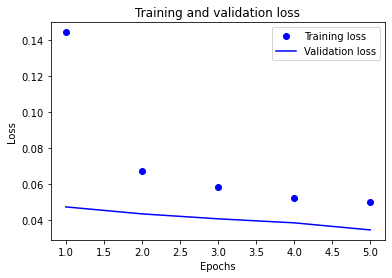

In [83]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss') 

plt.plot(epochs, val_loss_values, 'b', label='Validation loss') 

plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [84]:
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

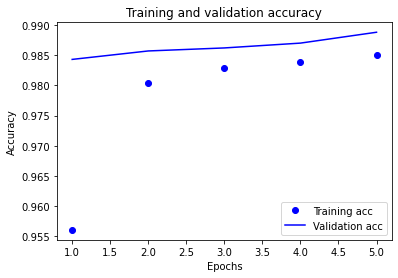

In [85]:
plt.clf()                                                           

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Step 6) Save your model. You will be using it in the second milestone.

In [86]:
model.save_weights('c:\\Users\\E10112538\\projects\\manning_art_transfer\\manning-art-style-transfer\\Milestones\\model.h5')

# Step 7) Test your model on some random samples from the test dataset.

In [87]:
predictions = model.predict(test_x[0:10])

In [88]:
predictions

array([[1.22829986e-08, 1.19459762e-10, 1.08144422e-06, 1.25149145e-05,
        3.69616178e-11, 1.50606938e-09, 4.92677730e-14, 9.99984741e-01,
        1.13216299e-08, 1.70782062e-06],
       [1.25717270e-06, 6.34794617e-07, 9.99994159e-01, 5.02456521e-09,
        2.42396953e-11, 9.20919938e-12, 3.87363480e-06, 8.23986807e-14,
        9.92575764e-08, 4.33720768e-13],
       [2.08561261e-07, 9.99830961e-01, 3.77441429e-05, 6.99723515e-08,
        7.94393491e-05, 9.48040054e-07, 2.61913078e-06, 1.92425541e-05,
        2.84217349e-05, 3.11659988e-07],
       [9.99965549e-01, 2.64180686e-13, 2.92276331e-06, 1.94764667e-08,
        2.34391129e-09, 3.81809571e-08, 6.72707210e-06, 1.34648870e-08,
        2.12750848e-07, 2.45387419e-05],
       [1.48311576e-08, 9.11099321e-11, 1.61713309e-08, 6.99698255e-09,
        9.99822080e-01, 1.57679883e-10, 2.17488694e-08, 8.86022065e-07,
        6.16594832e-07, 1.76570727e-04],
       [4.37132002e-07, 9.99255955e-01, 4.27146369e-05, 1.00142181e-07,
   

In [89]:
predictions[4]

array([1.4831158e-08, 9.1109932e-11, 1.6171331e-08, 6.9969825e-09,
       9.9982208e-01, 1.5767988e-10, 2.1748869e-08, 8.8602206e-07,
       6.1659483e-07, 1.7657073e-04], dtype=float32)

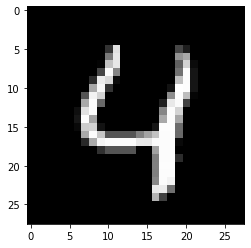

In [90]:
viewSample(4)